In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [105]:
def generateSinWave(samplingRate, duration, freq):
    samples = np.linspace(0, duration, int(duration * samplingRate), endpoint = False)
    wave = np.sin(2 * np.pi * freq * samples)
    return wave

def map(OldValue, OldMin, OldMax, NewMin, NewMax):
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

def plot(signal):
    plt.figure(figsize = (15, 7))
    plt.plot(signal)
    
def toRange(signal, oldMin, oldMax, newMin, newMax):
    for i in range(len(signal)):
        signal[i] = map(signal[i], oldMin, oldMax, newMin, newMax)
    return signal

def MAE(sig1, sig2):
    return np.mean(np.power(sig1 - sig2, 2))

samplingRate = 30
duration = 10
freq = 2.75

wave = generateSinWave(samplingRate, duration, freq)
plot(wave)

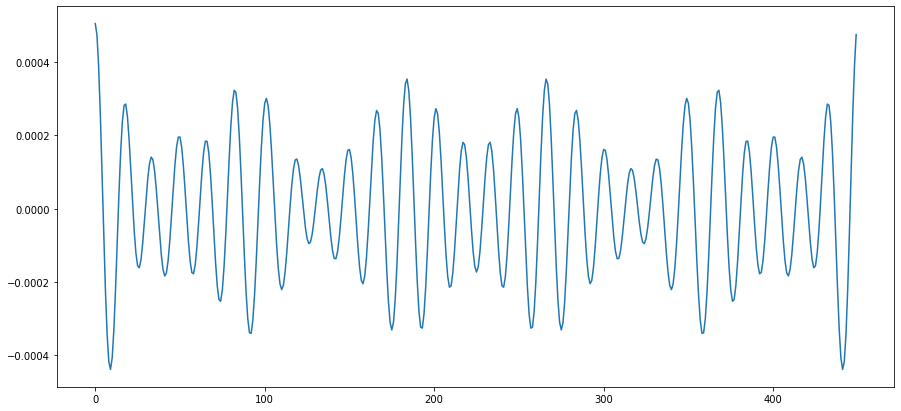

In [109]:
rPPG = np.squeeze(loadmat('ppg_signal')['ppg_signal'])
plot(rPPG)

In [96]:
def estimateFreq(signal, samplingRate, duration, freqRangeL, freqRangeU, max_iter = 1000):
    minMae = 1000000
    rangeL, rangeH = min(signal), max(signal)
    freqRange = np.linspace(freqRangeL, freqRangeU, max_iter)
    HR = 0
    selectedWave = None
    for i in range(max_iter):
        sinWave = generateSinWave(samplingRate, duration, freqRange[i])
        sinWave = toRange(sinWave, -1, 1, rangeL, rangeH)
        mae = MAE(sinWave, signal)
        if mae < minMae:
            selectedWave = sinWave
            minMae = mae
            HR = freqRange[i] * 60
    plt.figure(figsize = (17, 10))
    plt.plot(selectedWave)
    plt.plot(signal)
    return HR
    

<ipython-input-105-529d16224396>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  signal[i] = map(signal[i], oldMin, oldMax, newMin, newMax)


Elapsed time :  1.3412270545959473 HR :  109.5045045045045


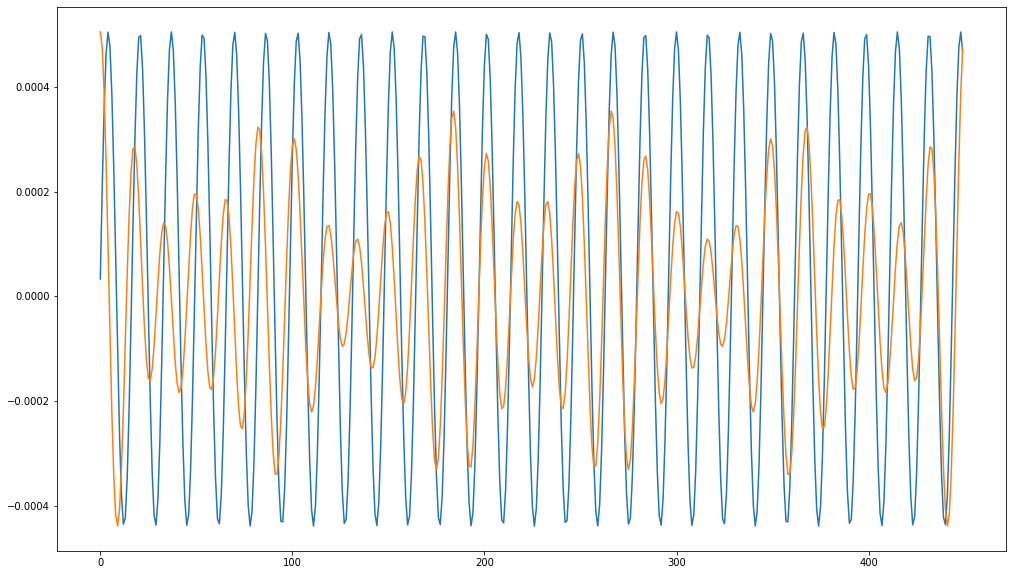

In [108]:
import time
start = time.time()
HR = estimateFreq(rPPG, 30, 15, 0.75, 2.75, 1000)
end = time.time()

print('Elapsed time : ', end - start, 'HR : ', HR)
#Turuncu orjinal sinyal, mavi oturtulan sin wave